In [1]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt; 
import pandas as pd
plt.rcdefaults()
%matplotlib inline

import PIL
import glob
import scikitplot as skplt

In [2]:
input_names = ["Band 1_11", "Band 1_12", "Band 1_13", 
               "Band 1_21", "Band 1_22", "Band 1_23",
               "Band 1_31", "Band 1_32", "Band 1_33",
               
               
               "Band 2_11", "Band 2_12", "Band 2_13", 
               "Band 2_21", "Band 2_22", "Band 2_23",
               "Band 2_31", "Band 2_32", "Band 2_33",
               
               "Band 3_11", "Band 3_12", "Band 3_13", 
               "Band 3_21", "Band 3_22", "Band 3_23",
               "Band 3_31", "Band 3_32", "Band 3_33",
               
               "Band 4_11", "Band 4_12", "Band 4_13", 
               "Band 4_21", "Band 4_22", "Band 4_23",
               "Band 4_31", "Band 4_32", "Band 4_33",
               
               "Band 6_11", "Band 6_12", "Band 6_13", 
               "Band 6_21", "Band 6_22", "Band 6_23",
               "Band 6_31", "Band 6_32", "Band 6_33",
               
               
               "MRH_11", "MRH_12", "MRH_13", 
               "MRH_21", "MRH_22", "MRH_23",
               "MRH_31", "MRH_32", "MRH_33",
               
               "MSH_11", "MSH_12", "MSH_13", 
               "MSH_21", "MSH_22", "MSH_23",
               "MSH_31", "MSH_32", "MSH_33",
               
               "MTE_11", "MTE_12", "MTE_13", 
               "MTE_21", "MTE_22", "MTE_23",
               "MTE_31", "MTE_32", "MTE_33",
               
               "MVI_11", "MVI_12", "MVI_13", 
               "MVI_21", "MVI_22", "MVI_23",
               "MVI_31", "MVI_32", "MVI_33"]

X_names = np.asarray(input_names)

In [3]:
folder = "../satyam_rad_sat_mod_npy/"
Sa1_files_all = glob.glob("../satyam_rad_sat_mod_npy/sa1_npy/*.npy")
Sa1_files_all

['../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030620.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010216.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030920.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010218.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030919.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010219.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031318.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010220.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031319.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012116.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031320.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012118.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032716.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012120.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032718.npy',
 '../satyam_rad_sat_mod_npy/sa1

In [4]:
# Test Train Split for Files
import random
import math
SEED = 42
random.seed(SEED)
random.shuffle(Sa1_files_all)

Sa1_files_all.sort()

size_Sa1 = len(Sa1_files_all)

Sa1_files_train_size = math.ceil(size_Sa1*.75)
Sa1_files_test_size = size_Sa1 - Sa1_files_train_size

Sa1_files_train = Sa1_files_all[:Sa1_files_train_size]
Sa1_files_test = Sa1_files_all[Sa1_files_train_size:]

In [5]:
np.size(Sa1_files_train)

262

In [6]:
np.size(Sa1_files_test)

87

In [7]:
Sa1_files_train

['../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010216.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010218.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010219.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010220.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012116.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012118.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012120.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012216.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012218.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012219.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012220.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012418.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012419.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012420.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017020620.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017020716.npy',
 '../satyam_rad_sat_mod_npy/sa1

In [8]:
Sa1_files_test

['../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072020.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072116.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072118.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072120.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072519.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017072520.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080916.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080918.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080919.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017080920.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081616.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081618.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081619.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081620.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081818.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017081819.npy',
 '../satyam_rad_sat_mod_npy/sa1

In [9]:
X_train = []
y_train = []

# Extracting training images only
for filename in Sa1_files_train:
    filename = filename.split('/')[-1]
    
    # Satellite 1
    Sa_1_File = folder + "sa1_npy/" + filename;
    Sa1arr = np.load(Sa_1_File)
    
    
    # Satellite 2
    Sa_2_File = folder + "sa2_npy/" + filename;
    Sa2arr = np.load(Sa_2_File)
    
    
    # Satellite 3
    Sa_3_File = folder + "sa3_npy/" + filename;
    Sa3arr = np.load(Sa_3_File)
    
    # Satellite 4
    Sa_4_File = folder + "sa4_npy/" + filename;
    Sa4arr = np.load(Sa_4_File)
    
    # Satellite 6
    Sa_6_File = folder + "sa6_npy/" + filename;
    Sa6arr = np.load(Sa_6_File)
    
    
    # Model Data has wrong orientation relative to the satellite
    # Thus using flipud
    
    # MRH
    MRH_File = folder + "mrh_npy/" + filename.replace('sat', "mod", 1)
    MRHarr = np.flipud(np.load(MRH_File))
    
    # MSH
    MSH_File = folder + "msh_npy/" + filename.replace('sat', "mod", 1)
    MSHarr = np.flipud(np.load(MSH_File))
    
    # MTE
    MTE_File = folder + "tem_npy/" + filename.replace('sat', "mod", 1)
    MTEarr = np.flipud(np.load(MTE_File))
    
    # MVI
    MVI_File = folder + "vis_npy/" + filename.replace('sat', "mod", 1)
    MVIarr = np.flipud(np.load(MVI_File))
    
    # Radar Data has wrong orientation relative to the satellite
    # Thus using flipud
    
    # Radar
    Radar_File = folder + "rad_npy/" + filename.replace('sat', "rad", 1)
    Radararr = np.flipud(np.load(Radar_File))
    
    rows = len(Sa1arr);
    cols = len(Sa1arr[0]);
    
    for row in range(1, rows-1):
        for col in range(1, cols-1):
            x = [];
            
            # Sa1
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(Sa1arr[row_][col_])
                    
            # Sa2
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(Sa2arr[row_][col_])
                    
                    
            # Sa3
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(Sa3arr[row_][col_])
                    
            # Sa4
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(Sa4arr[row_][col_])
                    
            # Sa6
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(Sa6arr[row_][col_])
                    
                    
                    
                    
            # MRH
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(MRHarr[row_][col_])    
                    
            # MSH
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(MSHarr[row_][col_])
                    
                    
            # MTE
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(MTEarr[row_][col_])
                    
                    
            # MVI
            for row_ in range(row-1, row+2):
                for col_ in range(col-1, col+2):
                    x.append(MVIarr[row_][col_])
                    
            # clip 0
            x = np.array(x)
            x[x < 0] = 0
            x = x.tolist()
                    
                    
            y_train.append(Radararr[row][col])        
            X_train.append(x)

In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [11]:
print(X_train.shape)
print(np.std(X_train))
print(np.min(X_train))
print(np.mean(X_train))
print(np.max(X_train))

(16903192, 81)
7851.412341527526
0.0
7953.929645635233
30993.517578125


In [12]:
print(y_train.shape)
print(np.std(y_train))
print(np.min(y_train))
print(np.mean(y_train))
print(np.max(y_train))

(16903192,)
21.277058049058493
0
20.617832063908402
953


In [13]:
# Train the Training set

In [14]:
rf_train = RandomForestRegressor()
rf_train.fit(X_train, y_train)

/home/wproj/.conda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [15]:
rf_train.feature_importances_.shape

(81,)

In [16]:
max_heat = np.max(rf_train.feature_importances_)
max_heat

0.10329170819041263

In [17]:
import seaborn as sns
feature_heatmap = rf_train.feature_importances_.reshape((27,3))

Text(0.5, 1.0, 'Band 1')

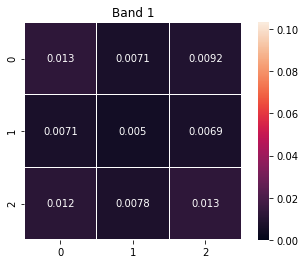

In [18]:
sns.heatmap(feature_heatmap[0:3], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat).set_title('Band 1')

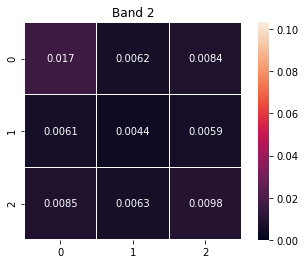

In [19]:
g2 = sns.heatmap(feature_heatmap[3:6], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat).set_title('Band 2')

Text(0.5, 1.0, 'Band 3')

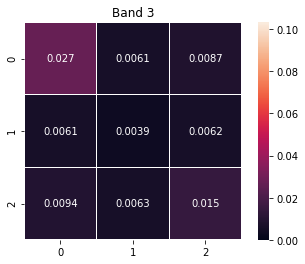

In [20]:
sns.heatmap(feature_heatmap[6:9], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat).set_title('Band 3')

Text(0.5, 1.0, 'Band 4')

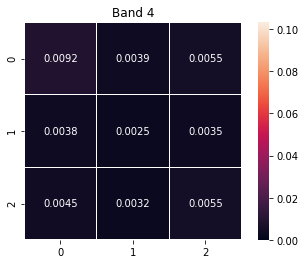

In [21]:
sns.heatmap(feature_heatmap[9:12], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat).set_title('Band 4')

Text(0.5, 1.0, 'Band 6')

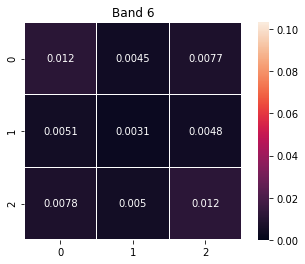

In [22]:
sns.heatmap(feature_heatmap[12:15], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat).set_title('Band 6')

Text(0.5, 1.0, 'MRH')

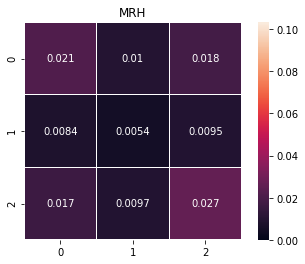

In [23]:
sns.heatmap(feature_heatmap[15:18], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat).set_title('MRH')

Text(0.5, 1.0, 'MSH')

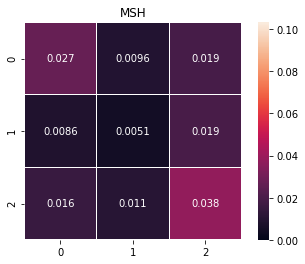

In [24]:
sns.heatmap(feature_heatmap[18:21], linewidths=.01, annot=True,square="true", vmin=0, vmax=max_heat).set_title('MSH')

Text(0.5, 1.0, 'MTE')

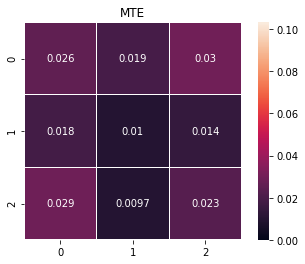

In [25]:
sns.heatmap(feature_heatmap[21:24], linewidths=.01, annot=True, square="true", vmin=0, vmax=max_heat).set_title('MTE')

Text(0.5, 1.0, 'MVI')

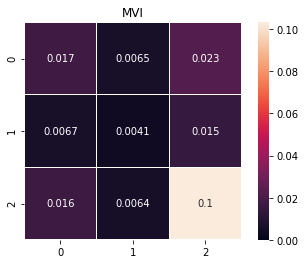

In [26]:
sns.heatmap(feature_heatmap[24:27], linewidths=.01, annot=True, square=True, vmin=0, vmax=max_heat).set_title('MVI')

In [27]:
# Evaluate the Trained output

In [28]:
predictions_train = rf_train.predict(X_train)

In [29]:
errors_train = abs(predictions_train - y_train)
np.max(errors_train)

423.1

(array([1.03796721e-02, 9.02640319e-05, 1.66214097e-05, 4.44168763e-06,
        1.41475976e-06, 5.09040372e-07, 1.68231635e-07, 6.02157513e-08,
        1.92442092e-08, 8.69093317e-09]),
 array([  0. ,  95.3, 190.6, 285.9, 381.2, 476.5, 571.8, 667.1, 762.4,
        857.7, 953. ]),
 <a list of 10 Patch objects>)

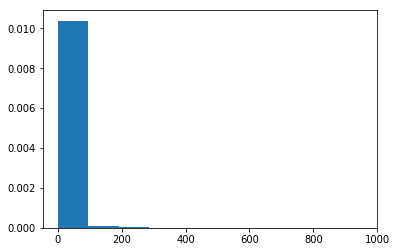

In [30]:
plt.hist(y_train, density=1)

(array([2.36016938e-02, 2.82043230e-05, 3.87178476e-06, 9.22852272e-07,
        2.51686983e-07, 8.94887051e-08, 2.79652204e-08, 9.78782712e-09,
        1.39826102e-09, 1.39826102e-09]),
 array([  0.  ,  42.31,  84.62, 126.93, 169.24, 211.55, 253.86, 296.17,
        338.48, 380.79, 423.1 ]),
 <a list of 10 Patch objects>)

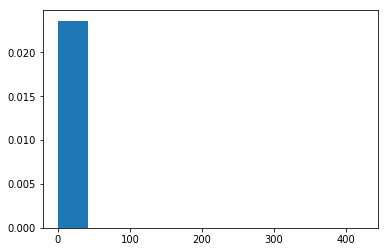

In [31]:
plt.hist(errors_train, density=1)

In [32]:
# Confusion Matrix

In [33]:
y_train_no_zero = list(filter(lambda a: a != 0, y_train))
print(np.shape(y_train_no_zero))
print(np.std(y_train_no_zero))
print(np.min(y_train_no_zero))
print(np.mean(y_train_no_zero))
print(np.max(y_train_no_zero))

(16709303,)
21.283243043961182
1
20.857074289693593
953


In [34]:
thershold = np.mean(y_train_no_zero) + 1 * np.std(y_train_no_zero)
thershold

42.14031733365478

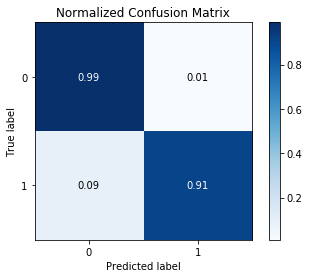

In [35]:
y_train_copy = np.copy(y_train)
y_train_copy[y_train_copy < thershold] = 0
y_train_copy[y_train_copy >= thershold] = 1

predictions_train_copy = np.copy(predictions_train)
predictions_train_copy[predictions_train_copy < thershold] = 0
predictions_train_copy[predictions_train_copy >= thershold] = 1

skplt.metrics.plot_confusion_matrix(y_train_copy, predictions_train_copy, normalize=True)
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix
FPR = []
TPR = []

for i in range(1, 531, 10):
    y_train_copy = np.copy(y_train)
    y_train_copy[y_train_copy < i] = 0
    y_train_copy[y_train_copy >= i] = 1

    predictions_train_copy = np.copy(predictions_train)
    predictions_train_copy[predictions_train_copy < i] = 0
    predictions_train_copy[predictions_train_copy >= i] = 1
    
    temp = confusion_matrix(y_train_copy, predictions_train_copy)
    
    TN = temp[0][0]
    FP = temp[0][1]
    FN = temp[1][0]
    TP = temp[1][1]
    
    TPR_ = TP/(TP+FN)
    FPR_ = FP/(TN+FP)
    
    FPR.append(FPR_)
    TPR.append(TPR_)

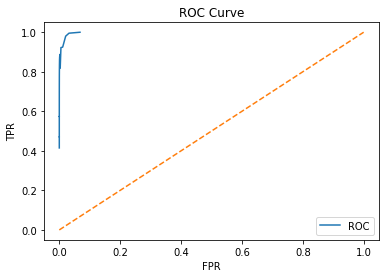

In [37]:
plt.plot(FPR, TPR, label='ROC')
plt.plot([0,1], [0,1], linestyle='dashed')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR");
plt.legend()

In [38]:
# Save the Model
import pickle
filename = 'MODEL_OUT_Final_Random_Forest_3x3_npy_SA_MOD.sav'
pickle.dump(rf_train, open(filename, 'wb'))